In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [10]:
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import os 

In [11]:
data= pd.read_csv('C:/Users/pc/Downloads/Telegram Desktop/train.csv')

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
data.isna().sum() #isna() helps that the value is null or not, and checking the total null values then add them.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### How many survived?

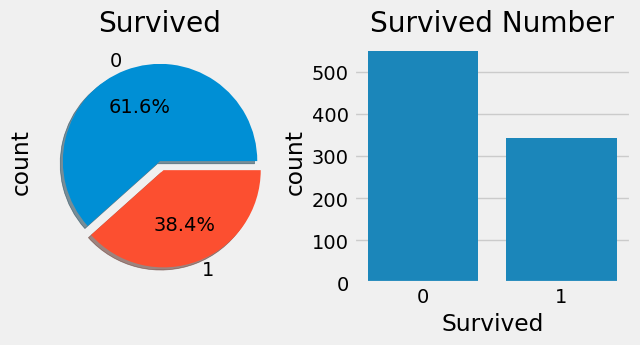

In [21]:
f,ax=plt.subplots(1,2,figsize=(7,3))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')

sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived Number')
plt.show()

It is evident that not many passengers survived the accident. 

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

First let us understand the different types of features.

## Types Of Features

### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Sex,Embarked.

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

Ordinal Features in the dataset: PClass

### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Age

In [23]:
data.groupby(['Sex' , 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

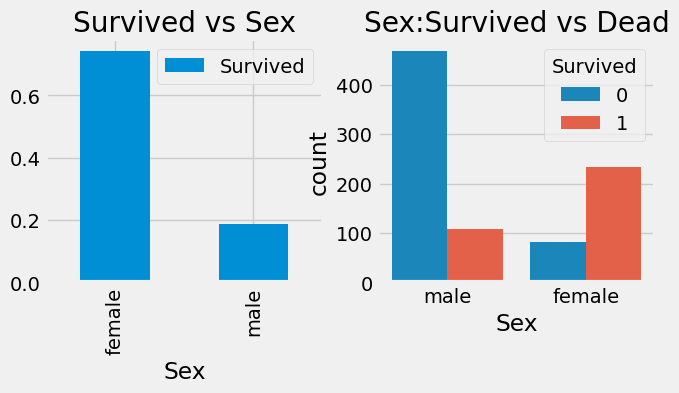

In [25]:
f,ax= plt.subplots(1,2,figsize=(7,3))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

#Pclass --> Ordinal Feature

This looks intresting. The number of men on the ship is lot more than the number of women. Still the number of women saved is twice
the number of men saved. The survival rates for a women ont he ship is around 75% while that for men is around 18-19%.


This looks to be a very important feature foe modelling.But is it he best ?? Let's check other feature.

In [27]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


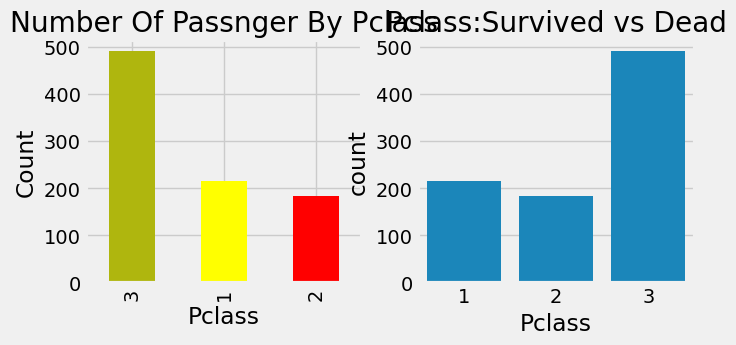

In [37]:
f,ax=plt.subplots(1,2,figsize=(7,3))
data['Pclass'].value_counts().plot.bar(color=['#afb60e','yellow','red'],ax=ax[0])
ax[0].set_title('Number Of Passnger By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say Money Can't Buy Everything.But we can see that Passangers Of Pclass were given a very high priority while rescue.Even
through the number of Passanger in Pclass 3 were a lot higher, still the number of surviver is very low, somewhere around 25%.

For Pclass 1% survivedis around 48%. So money and status matters.Such a materialistic world.

Lets Dive in little bit more and check fo other intresting observation. Lets checkc survival rate with Sex and Pclass Together.

In [43]:
pd.crosstab([data.Sex, data.Survived], data.Pclass,margins=True).style.background_gradient(cmap='GnBu')